In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

import geopandas

# Prepare Data

In [67]:
gdf = geopandas.read_file('https://github.com/thomaspingel/geodata/raw/master/election/election.gpkg',dtype={"FIPS":str})
gdf.head()

C:\Anaconda3\envs\analysis_in_gis\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,GEOID,NAME,STUSPS,STATE_NAME,FIPS,gop_2000_votes,dem_2000_votes,totalvotes_2000,gop_2000_prc,dem_2000_prc,...,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020,geometry
0,01061,Geneva,AL,Alabama,01061,6588.0,2769.0,9559.0,68.92,28.97,...,85.00,12.97,72.03,10848.0,1595.0,12545.0,86.47,12.71,73.76,"POLYGON ((-86.19348 31.19221, -86.12541 31.182..."
1,08125,Yuma,CO,Colorado,08125,3156.0,1082.0,4358.0,72.42,24.83,...,80.36,15.15,65.21,4107.0,785.0,4981.0,82.45,15.76,66.69,"POLYGON ((-102.80377 40.00255, -102.79358 40.3..."
2,17177,Stephenson,IL,Illinois,17177,10715.0,8062.0,19378.0,55.29,41.60,...,54.48,38.19,16.29,12521.0,9055.0,22048.0,56.79,41.07,15.72,"POLYGON ((-89.92647 42.50579, -89.83759 42.504..."
3,28153,Wayne,MS,Mississippi,28153,4635.0,2981.0,7705.0,60.16,38.69,...,62.40,36.71,25.69,6307.0,3624.0,10056.0,62.72,36.04,26.68,"POLYGON ((-88.94335 31.82456, -88.91046 31.826..."
4,34041,Warren,NJ,New Jersey,34041,22172.0,16543.0,40801.0,54.34,40.55,...,60.64,35.10,25.54,34769.0,24901.0,60787.0,57.20,40.96,16.24,"POLYGON ((-75.19261 40.71587, -75.17748 40.764..."


In [68]:
chr_data = pd.read_csv('https://github.com/thomaspingel/geodata/raw/master/county_health_rankings/chr_2019.csv',dtype={'FIPS':str})
chr_data.head()

,FIPS,State,County,Premature death - Years of Potential Life Lost Rate,Premature death - YPLL Rate (Black),Premature death - YPLL Rate (Hispanic),Premature death - YPLL Rate (White),Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,...,Demographics - % Native Hawaiian/Other Pacific Islander,Demographics - # Hispanic,Demographics - % Hispanic,Demographics - # Non-Hispanic White,Demographics - % Non-Hispanic White,Demographics - # Not Proficient in English,Demographics - % Not Proficient in English,Demographics - % Female,Demographics - # Rural,Demographics - % Rural
0,01001,Alabama,Autauga,8824.057123,10471.252986,NaN,8706.658832,18.411124,4.200578,4.306739,...,0.104497,1586,2.857452,41336,74.473912,430,0.828548,51.342246,22921.0,42.002162
1,01003,Alabama,Baldwin,7224.632160,10042.472874,3086.605695,7277.780727,18.060458,4.098748,4.249649,...,0.068665,9675,4.550200,176582,83.047388,872,0.454512,51.452772,77060.0,42.279099
2,01005,Alabama,Barbour,9586.165037,11332.562909,NaN,7309.636719,25.773416,5.067438,4.634994,...,0.185991,1063,4.206569,11613,45.955679,297,1.199273,47.229917,18613.0,67.789635
3,01007,Alabama,Bibb,11783.543675,14812.539280,NaN,11327.563749,19.996912,4.363377,4.315710,...,0.114699,598,2.638080,16842,74.298571,84,0.394348,46.453150,15663.0,68.352607
4,01009,Alabama,Blount,10908.101822,NaN,5619.645186,11336.046321,21.095323,4.512753,4.701599,...,0.117215,5549,9.565097,50439,86.944306,1013,1.870004,50.688639,51562.0,89.951502


In [146]:
cv = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv',dtype={'fips':str})
cv.date = pd.to_datetime(cv.date)
cv.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0.0
1,2020-01-22,Snohomish,Washington,53061,1,0.0
2,2020-01-23,Snohomish,Washington,53061,1,0.0
3,2020-01-24,Cook,Illinois,17031,1,0.0
4,2020-01-24,Snohomish,Washington,53061,1,0.0


In [109]:
cv_grouped = pd.DataFrame(cv.groupby('fips').max()).reset_index()
cv_grouped.head()

,fips,date,county,state,cases,deaths
0,01001,2021-12-05,Autauga,Alabama,10561,157.0
1,01003,2021-12-05,Baldwin,Alabama,38207,589.0
2,01005,2021-12-05,Barbour,Alabama,3708,80.0
3,01007,2021-12-05,Bibb,Alabama,4362,95.0
4,01009,2021-12-05,Blount,Alabama,10782,193.0


# Merge together

In [110]:
df = gdf.copy()
df = df.merge(chr_data,how='left',on='FIPS')
df = df.merge(cv_grouped,how='left',left_on='FIPS',right_on='fips')
np.shape(df)

(3221, 210)

In [111]:
print(df.columns.values)

['GEOID' 'NAME' 'STUSPS' 'STATE_NAME' 'FIPS' 'gop_2000_votes'
 'dem_2000_votes' 'totalvotes_2000' 'gop_2000_prc' 'dem_2000_prc'
 'gop_minus_dem_prc_2000' 'gop_2004_votes' 'dem_2004_votes'
 'totalvotes_2004' 'gop_2004_prc' 'dem_2004_prc' 'gop_minus_dem_prc_2004'
 'gop_2008_votes' 'dem_2008_votes' 'totalvotes_2008' 'gop_2008_prc'
 'dem_2008_prc' 'gop_minus_dem_prc_2008' 'gop_2012_votes' 'dem_2012_votes'
 'totalvotes_2012' 'gop_2012_prc' 'dem_2012_prc' 'gop_minus_dem_prc_2012'
 'gop_2016_votes' 'dem_2016_votes' 'totalvotes_2016' 'gop_2016_prc'
 'dem_2016_prc' 'gop_minus_dem_prc_2016' 'gop_2020_votes' 'dem_2020_votes'
 'totalvotes_2020' 'gop_2020_prc' 'dem_2020_prc' 'gop_minus_dem_prc_2020'
 'geometry' 'State' 'County'
 'Premature death - Years of Potential Life Lost Rate'
 'Premature death - YPLL Rate (Black)'
 'Premature death - YPLL Rate (Hispanic)'
 'Premature death - YPLL Rate (White)' 'Poor or fair health - % Fair/Poor'
 'Poor physical health days - Physically Unhealthy Days'
 'Poor 

In [112]:
df['deaths_per_thousand'] = 1000 * df.deaths / df['Demographics - Population']
df['cases_per_thousand'] = 1000 * df.cases / df['Demographics - Population']

df['calc_area'] = (df.geometry.to_crs(epsg=8857).area) / 1000**2
df['lat'] = df.centroid.apply(lambda p: p.y)
df['lon'] = df.centroid.apply(lambda p: p.x)

df['population_density'] = df['Demographics - Population'] / df.calc_area

C:\Users\THOMAS~1\AppData\Local\Temp/ipykernel_20524/2923341954.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['lat'] = df.centroid.apply(lambda p: p.y)
C:\Users\THOMAS~1\AppData\Local\Temp/ipykernel_20524/2923341954.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['lon'] = df.centroid.apply(lambda p: p.x)


In [144]:
df.to_file('coronavirus.geojson',driver='GeoJSON')

# Analyze

## Map

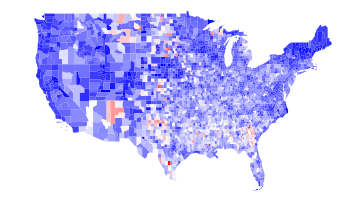

In [140]:
df.plot(column='deaths_per_thousand',cmap='bwr')
plt.xlim(-130,-65)
plt.ylim(23,50)
_ = plt.axis('off')

## Single Variable

In [120]:
y = 'deaths_per_thousand'
x = 'lat'

C:\Anaconda3\envs\analysis_in_gis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lat', ylabel='deaths_per_thousand'>

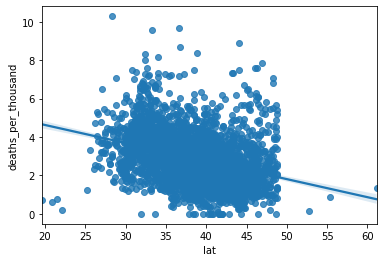

In [121]:
seaborn.regplot(x,y,data=df)

In [122]:
_df = df.loc[:,[x,y]]
_df = _df.dropna(how='any')

r, p = stats.pearsonr(_df[x],_df[y])
print('Pearson r = ',r,'P = ',p)

r,p = stats.spearmanr(_df[x],_df[y])
print('Spearman r = ',r,'P = ',p)

Pearson r =  -0.33969571298959333 P =  7.472273618834481e-85
Spearman r =  -0.388797104626286 P =  9.077703820945598e-113


In [125]:
_df = pd.DataFrame()
_df['x'] = df.loc[:,x]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     405.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           7.47e-85
Time:                        00:03:41   Log-Likelihood:                -5168.5
No. Observations:                3110   AIC:                         1.034e+04
Df Residuals:                    3108   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5028      0.180     36.156      0.0

## Multiple Regression

In [123]:
y = 'deaths_per_thousand'

x0 = 'gop_minus_dem_prc_2020'
x1 = 'Flu vaccinations - % Vaccinated'
x2 = 'lat'

In [127]:
# A full model

_df = pd.DataFrame()
_df['x0'] = df.loc[:,x0]
_df['x1'] = df.loc[:,x1]
_df['x2'] = df.loc[:,x2]
_df['y'] = df.loc[:,y]
_df = _df.dropna(how='any')

# Then run the regression
results = smf.ols(formula='y ~ x0*x1*x2',data=_df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     126.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.72e-164
Time:                        00:04:35   Log-Likelihood:                -4951.0
No. Observations:                3104   AIC:                             9918.
Df Residuals:                    3096   BIC:                             9966.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4052      0.982      9.573      0.0